In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("C:\\Users\\ANKIT JHA\\Desktop\\car sell.csv")
df

,carmodel,mileage,sell price,avg(yrs)
0,BMWX5,69000,18000,6
1,BMWX5,35000,34000,3
2,BMWX5,57000,26100,5
3,BMWX5,22500,40000,2
4,BMWX5,46000,31500,4
5,Auidi A5,59000,29400,5
6,Auidi A5,52000,32000,5
7,Auidi A5,72000,19300,6
8,Auidi A5,91000,12000,8
9,Mercedz,67000,22000,6


In [3]:
dummies = pd.get_dummies(df.carmodel)
dummies

,Auidi A5,BMWX5,Mercedz
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [4]:
df2 = pd.concat([df,dummies],axis = 'columns')
df2

,carmodel,mileage,sell price,avg(yrs),Auidi A5,BMWX5,Mercedz
0,BMWX5,69000,18000,6,0,1,0
1,BMWX5,35000,34000,3,0,1,0
2,BMWX5,57000,26100,5,0,1,0
3,BMWX5,22500,40000,2,0,1,0
4,BMWX5,46000,31500,4,0,1,0
5,Auidi A5,59000,29400,5,1,0,0
6,Auidi A5,52000,32000,5,1,0,0
7,Auidi A5,72000,19300,6,1,0,0
8,Auidi A5,91000,12000,8,1,0,0
9,Mercedz,67000,22000,6,0,0,1


In [5]:
final = df2.drop(['carmodel','Mercedz'], axis = 'columns')
final

,mileage,sell price,avg(yrs),Auidi A5,BMWX5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [6]:
x = final["avg(yrs)"]
y = final["sell price"]

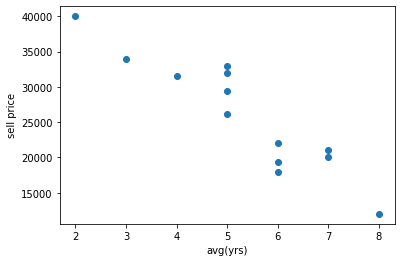

In [7]:
plt.scatter(x,y)
plt.xlabel("avg(yrs)")
plt.ylabel("sell price")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
X = final.drop('sell price',axis = 'columns')
X

,mileage,avg(yrs),Auidi A5,BMWX5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [10]:
y = final['sell price']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: sell price, dtype: int64

In [11]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# price of mercedz with 45000 mileage and 4 yr old

In [12]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

# price of bmw x5 that is 7 yr old with mileage 86000

In [13]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

In [14]:
model.score(X,y)

0.9417050937281083

In [20]:
import pickle

In [21]:
with open('model_pickle','wb')  as E:
    pickle.dump(model,E)

In [22]:
with open('model_pickle','rb')  as E:
    mp = pickle.load(E)